<a href="https://colab.research.google.com/github/Krishnaa548/Diabeties_prediction_model/blob/main/Diabeties_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ipywidgets import interact, widgets

# Load data
df = pd.read_csv("/content/diabetes_data.csv")

# Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 75.32%


In [ ]:
pregnancies = widgets.IntSlider(min=0, max=17, value=3, description='Pregnancies')
glucose = widgets.IntSlider(min=0, max=200, value=120, description='Glucose')
bp = widgets.IntSlider(min=0, max=122, value=70, description='Blood Pressure')
skinthickness = widgets.IntSlider(min=0, max=100, value=20, description='Skin Thickness')
insulin = widgets.IntSlider(min=0, max=846, value=79, description='Insulin')
bmi = widgets.FloatSlider(min=0.0, max=67.0, value=20.0, description='BMI')
dpf = widgets.FloatSlider(min=0.0, max=2.4, value=0.47, description='DPF')
age = widgets.IntSlider(min=21, max=88, value=33, description='Age')
predict_btn = widgets.Button(description="Predict")

In [ ]:
def make_prediction(b):
    user_data = pd.DataFrame({
        'Pregnancies': [pregnancies.value],
        'Glucose': [glucose.value],
        'BloodPressure': [bp.value],
        'SkinThickness': [skinthickness.value],
        'Insulin': [insulin.value],
        'BMI': [bmi.value],
        'DiabetesPedigreeFunction': [dpf.value],
        'Age': [age.value]
    })

    prediction = rf.predict(user_data)
    color = 'red' if prediction[0] == 1 else 'blue'

    print("\nPatient Data:")
    display(user_data)
    print(f"\nPrediction: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")
    print(f"Accuracy: {accuracy*100:.2f}%")

    def plot_comparison(feature, df, user_value, color):
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x='Age', y=feature, hue='Outcome', data=df)
        plt.scatter(x=user_data['Age'], y=user_value, color=color, s=150, label='Your Value')
        plt.title(f'{feature} Comparison')
        plt.legend()
        plt.show()

    features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
               'Insulin', 'BMI', 'DiabetesPedigreeFunction']

    for feature in features:
        plot_comparison(feature, df, user_data[feature].values[0], color)

predict_btn.on_click(make_prediction)

IntSlider(value=3, description='Pregnancies', max=17)

IntSlider(value=120, description='Glucose', max=200)

IntSlider(value=70, description='Blood Pressure', max=122)

IntSlider(value=20, description='Skin Thickness')

IntSlider(value=79, description='Insulin', max=846)

FloatSlider(value=20.0, description='BMI', max=67.0)

FloatSlider(value=0.47, description='DPF', max=2.4)

IntSlider(value=33, description='Age', max=88, min=21)

Button(description='Predict', style=ButtonStyle())


Patient Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,200,70,20,79,20.0,0.47,33



Prediction: Diabetic
Accuracy: 75.32%


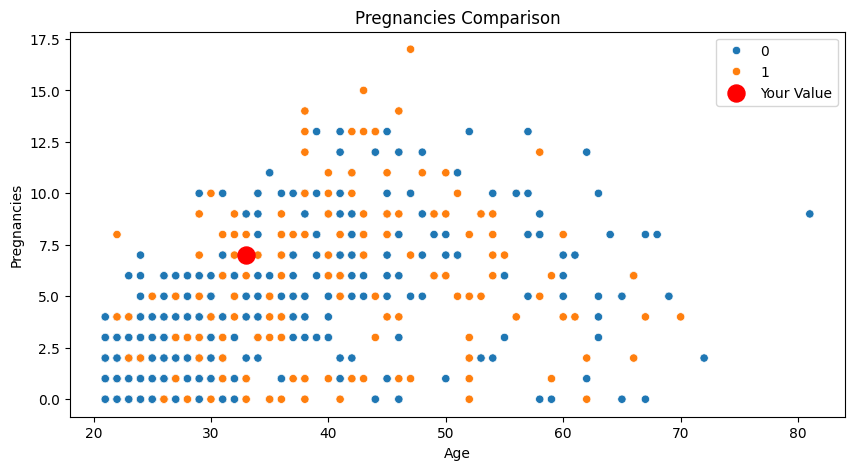

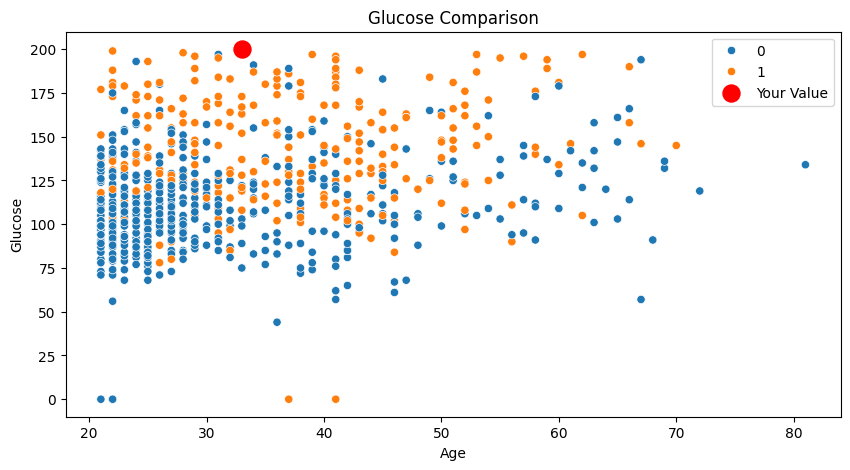

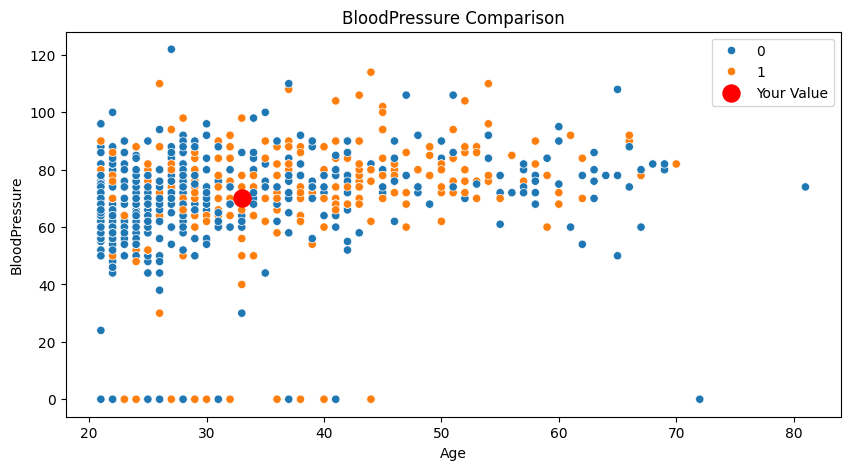

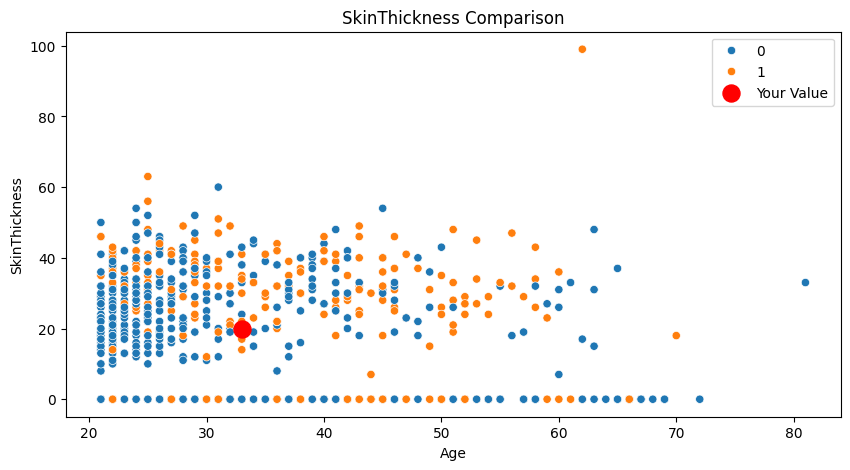

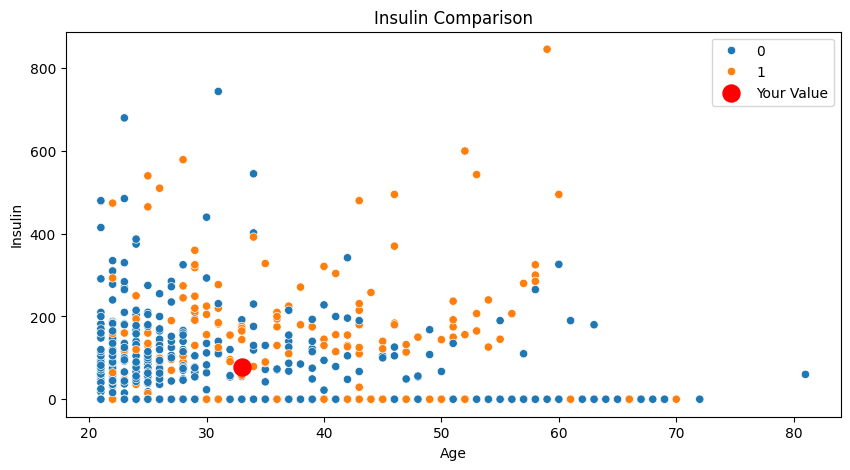

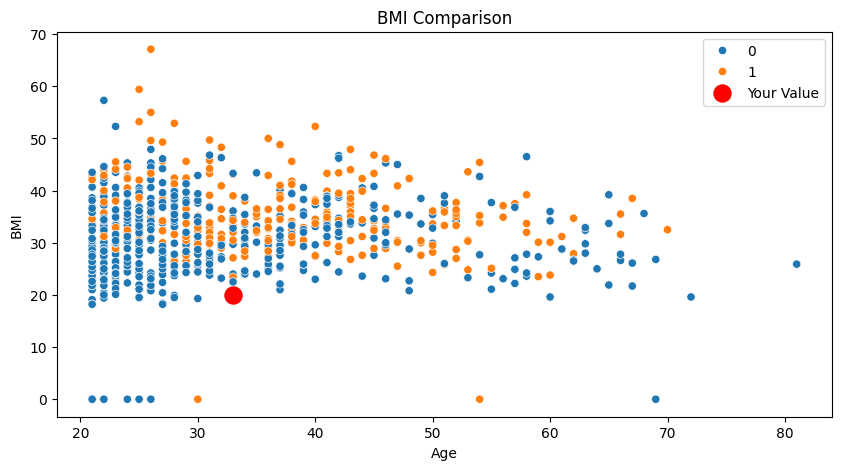

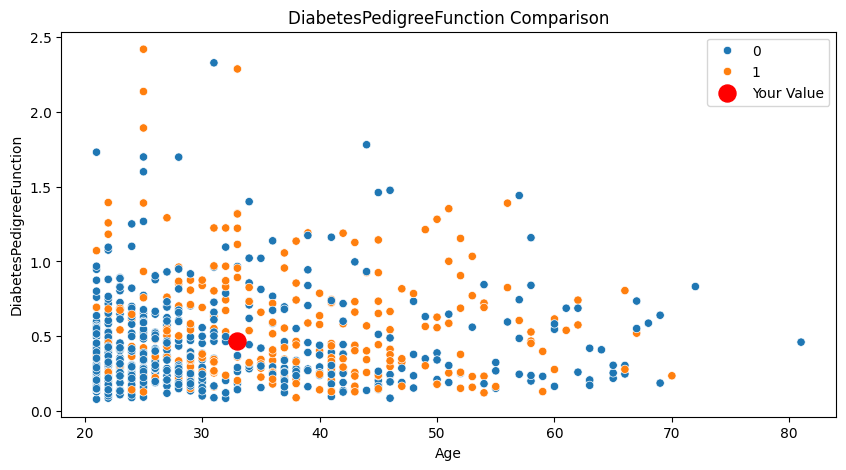

In [ ]:
display(pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age, predict_btn)